In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#%cd /content/drive/My\ Drive/pied-paper

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

C:\Users\paulh\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

9913344it [00:01, 5335944.40it/s]                             


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw


29696it [00:00, 28469497.50it/s]         

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw


1649664it [00:00, 5690022.31it/s]                             


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw


5120it [00:00, ?it/s]                   

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw
Processing...



C:\Users\paulh\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


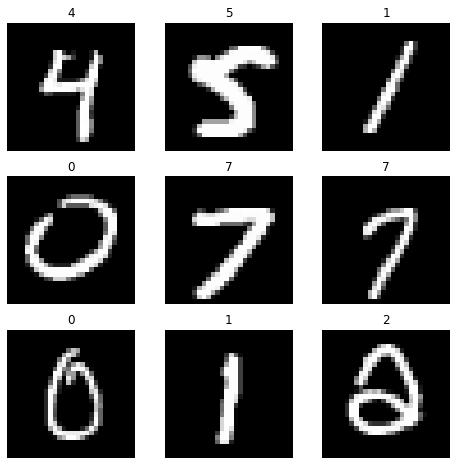

In [5]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [7]:
next(iter(train_dataloader))[0].shape

torch.Size([64, 1, 28, 28])

In [8]:
train_features, train_labels = next(iter(train_dataloader))

In [9]:
print(train_features.shape)
print(train_labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


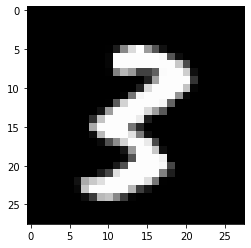

Label: 3


In [10]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [11]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear = nn.Linear(28*28, 10)
  def forward(self, x):
    out = self.linear(x)
    return out

In [12]:
device="cpu"
model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [13]:
print(model)

MLP(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 0 | Batch 0 | Loss   2.29
	Epoch 0 | Batch 100 | Loss   0.79
	Epoch 0 | Batch 200 | Loss   0.76
	Epoch 0 | Batch 300 | Loss   0.74
	Epoch 0 | Batch 400 | Loss   0.48
	Epoch 0 | Batch 500 | Loss   0.44
	Epoch 0 | Batch 600 | Loss   0.32
	Epoch 0 | Batch 700 | Loss   0.39
	Epoch 0 | Batch 800 | Loss   0.32
	Epoch 0 | Batch 900 | Loss   0.37
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 0 | Loss   0.54
Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 1 | Batch 0 | Loss   0.30
	Epoch 1 | Batch 100 | Loss   0.25
	Epoch 1 | Batch 200 | Loss   0.34
	Epoch 1 | Batch 300 | Loss   0.36
	Epoch 1 | Batch 400 | Loss   0.20
	Epoch 1 | Batch 500 | Loss   0.46
	Epoch 1 | Batch 600 | Loss   0.43
	Epoch 1 | Batch 700 | Loss   0.19
	Epoch 1 | Batch 800 | Loss   0.20
	Epoch 1 | Batch 900 | Loss   0.35
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 1 | Loss   0.43
Batch num: 0
Input d

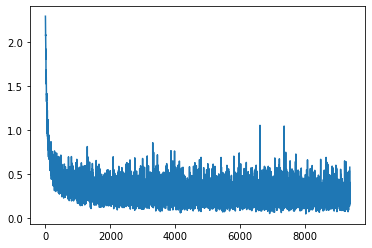

In [14]:
epochs = 10
batch_size = 64

model.train()

losses = []
for epoch in range(epochs):

  for batch_num, input_data in enumerate(train_dataloader):
    if batch_num == 0 or batch_num == round(len(training_data) / batch_size)-1:
      print(f"Batch num: {batch_num}")
      print(f"Input data shape: {input_data[0].shape}")
    else:
      pass
    
    optimizer.zero_grad()
    x, y = input_data
    x = x.to(device).float()
    y = y.to(device)

    output = model(x.reshape(-1, 28*28))
    loss = criterion(output, y)
    loss.backward()
    losses.append(loss.item())

    optimizer.step()

    if batch_num % 100 == 0:
      print('\tEpoch %d | Batch %d | Loss %6.2f' % (epoch, batch_num, loss.item()))
  print('Epoch %d | Loss %6.2f' % (epoch, sum(losses)/len(losses)))
plt.plot(losses)

In [15]:
model(next(iter(train_dataloader))[0].reshape(batch_size, 28*28))[0]

tensor([-5.3276, -9.6293, -1.4587, -3.9845, -4.0538,  0.2474, -6.1948, -9.6749,
         6.2970, -1.4295], grad_fn=<SelectBackward>)

In [16]:
import csv
model.eval()

with open('mlp_submission.csv', 'w') as f:
    fieldnames = ['ImageId', 'Label']
    writer = csv.DictWriter(f, fieldnames=fieldnames, lineterminator = '\n')
    writer.writeheader()
    image_id = 1

    with torch.no_grad():
        predictions = []
        num = 1
        for x, y_targ in test_dataloader:
            x = x[0].to(device).float()

            output = model(x.reshape(-1, 28*28)).argmax(dim=1)
            for y in output:
                writer.writerow({fieldnames[0]: image_id,fieldnames[1]: y.item()})
                image_id += 1
            
            if len(test_dataloader) % num == 5:
              print(output)
              print(y_targ[0].reshape(1,))

            num += 1
            predictions.append(torch.equal(output, y_targ[0].reshape(1,)))
        
        accuracy = sum(predictions) / len(predictions)
        print(f"Length of predictions: {len(predictions)}")
        print(f"Accuracy : {accuracy}")
        

tensor([1])
tensor([1])
tensor([4])
tensor([4])
tensor([9])
tensor([9])
tensor([2])
tensor([2])
tensor([2])
tensor([2])
Length of predictions: 157
Accuracy : 0.9426751592356688


In [17]:
True+True

2

CNN

In [18]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.seq = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1),
        nn.ReLU(),
    )
    self.linear = nn.Linear(8*28*28, 10)
  def forward(self, x):
    seq = self.seq(x)
    res = seq.reshape(-1, 8*28*28)
    out = self.linear(res)
    return out

In [19]:
x, y = next(iter(train_dataloader))
print(x.shape)
print(y.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [20]:
device = 'cpu'
cnn_model = CNN().to(device)
print(cnn_model)
optimizer = torch.optim.Adam(cnn_model.parameters())
criterion = nn.CrossEntropyLoss()

CNN(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
  )
  (linear): Linear(in_features=6272, out_features=10, bias=True)
)


In [21]:
cnn_model(x).shape

torch.Size([64, 10])

Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 0 | Batch 0 | Loss   2.31
	Epoch 0 | Batch 100 | Loss   0.32
	Epoch 0 | Batch 200 | Loss   0.12
	Epoch 0 | Batch 300 | Loss   0.30
	Epoch 0 | Batch 400 | Loss   0.12
	Epoch 0 | Batch 500 | Loss   0.14
	Epoch 0 | Batch 600 | Loss   0.28
	Epoch 0 | Batch 700 | Loss   0.03
	Epoch 0 | Batch 800 | Loss   0.19
	Epoch 0 | Batch 900 | Loss   0.13
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 0 | Loss   0.22
Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 1 | Batch 0 | Loss   0.02
	Epoch 1 | Batch 100 | Loss   0.21
	Epoch 1 | Batch 200 | Loss   0.12
	Epoch 1 | Batch 300 | Loss   0.10
	Epoch 1 | Batch 400 | Loss   0.06
	Epoch 1 | Batch 500 | Loss   0.03
	Epoch 1 | Batch 600 | Loss   0.04
	Epoch 1 | Batch 700 | Loss   0.02
	Epoch 1 | Batch 800 | Loss   0.03
	Epoch 1 | Batch 900 | Loss   0.04
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 1 | Loss   0.15
Batch num: 0
Input d

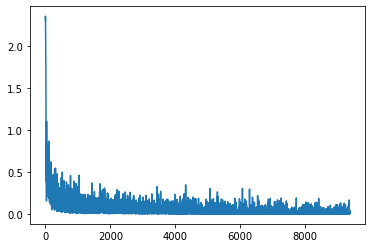

In [22]:
epochs = 10
batch_size = 64

losses = []
cnn_model.train()
for epoch in range(epochs):
  for batch_num, input_data in enumerate(train_dataloader):
    if batch_num == 0 or batch_num == round(len(training_data) / batch_size)-1:
      print(f"Batch num: {batch_num}")
      print(f"Input data shape: {input_data[0].shape}")
    else:
      pass
    
    optimizer.zero_grad()
    x, y = input_data
    x = x.to(device).float()
    y = y.to(device)

    output = cnn_model(x)
    loss = criterion(output, y)
    loss.backward()
    losses.append(loss.item())

    optimizer.step()

    if batch_num % 100 == 0:
      print('\tEpoch %d | Batch %d | Loss %6.2f' % (epoch, batch_num, loss.item()))
  print('Epoch %d | Loss %6.2f' % (epoch, sum(losses)/len(losses)))
plt.plot(losses)

In [23]:
len(train_dataloader)

938

In [24]:
import csv
cnn_model.eval()

with open('cnn_submission.csv', 'w') as f:
    fieldnames = ['ImageId', 'Label']
    writer = csv.DictWriter(f, fieldnames=fieldnames, lineterminator = '\n')
    writer.writeheader()
    image_id = 1

    with torch.no_grad():
        predictions = []
        num = 1
        for x, y_targ in test_dataloader:
            x = x.to(device).float()

            output = cnn_model(x).argmax(dim=1)
            for y in output:
                writer.writerow({fieldnames[0]: image_id,fieldnames[1]: y.item()})
                image_id += 1
            
            if len(test_dataloader) % num == 5:
              print(output)
              print(y_targ)

            num += 1
            predictions.append(torch.eq(output, y_targ))
        
        print(predictions[0])
        print(predictions[0].shape)
        print(sum(predictions[:2]))
        print(len(predictions))
        tot_sum = 0
        tot_len = 0
        for tensor in predictions:
          tot_sum += sum(tensor)
          tot_len += len(tensor)
        accuracy = tot_sum / tot_len
        print(f"Length of predictions: {tot_len}")
        print(f"Accuracy : {accuracy}")
        

tensor([2, 6, 4, 4, 3, 7, 6, 1, 5, 9, 7, 4, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0,
        5, 7, 0, 2, 5, 1, 5, 0, 6, 8, 3, 3, 0, 4, 8, 1, 5, 0, 1, 7, 5, 8, 2, 0,
        5, 2, 0, 9, 2, 8, 4, 9, 9, 7, 0, 6, 0, 2, 2, 7])
tensor([2, 6, 4, 4, 3, 7, 6, 1, 5, 9, 7, 4, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 3, 0,
        5, 7, 0, 2, 5, 1, 5, 0, 6, 8, 3, 3, 0, 4, 8, 1, 5, 0, 1, 7, 5, 8, 2, 0,
        5, 2, 8, 9, 2, 8, 4, 9, 9, 7, 0, 6, 0, 2, 2, 7])
tensor([0, 5, 0, 5, 8, 1, 9, 5, 4, 9, 0, 7, 7, 8, 3, 0, 5, 7, 9, 4, 4, 2, 9, 8,
        7, 4, 3, 1, 4, 8, 2, 8, 6, 4, 6, 7, 0, 1, 2, 2, 0, 8, 1, 1, 6, 3, 3, 2,
        2, 4, 9, 5, 1, 2, 1, 9, 5, 8, 0, 3, 6, 5, 0, 7])
tensor([0, 5, 0, 5, 8, 1, 9, 5, 4, 9, 0, 7, 7, 8, 3, 0, 5, 7, 9, 4, 4, 2, 9, 8,
        7, 4, 3, 1, 4, 8, 2, 8, 6, 4, 6, 7, 0, 1, 2, 2, 0, 8, 1, 1, 6, 3, 3, 2,
        2, 4, 9, 5, 1, 2, 1, 9, 5, 8, 0, 3, 6, 5, 0, 7])
tensor([9, 1, 2, 0, 4, 8, 3, 2, 1, 4, 2, 8, 4, 5, 7, 5, 0, 8, 6, 2, 2, 8, 4, 1,
        3, 4, 8, 7, 1, 1, 2, 0, 3, 9, 8, 1, 9, 9, 4,

RNN

In [25]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.sequence_length = 28
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.num_classes = num_classes

    self.rnn = nn.RNN(self.input_size, self.hidden_size, self.num_layers, batch_first = True)  
    self.linear = nn.Linear(self.hidden_size, self.num_classes)
  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

    out, _ = self.rnn(x, h0)
    out = out[:, -1, :]

    out = self.linear(out)
    return out

In [26]:
input_size = 28
sequence_length = 28
hidden_size = 128
num_layers = 1
num_classes = 10

In [27]:
device = 'cpu'
rnn_model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(rnn_model.parameters())
criterion = nn.CrossEntropyLoss()

In [28]:
batch_num, input_data = next(enumerate(train_dataloader))
x, y = input_data
print(batch_num)
print(x.shape)
print(y)

0
torch.Size([64, 1, 28, 28])
tensor([0, 4, 5, 2, 3, 4, 6, 8, 0, 7, 5, 6, 5, 6, 6, 8, 2, 3, 4, 9, 0, 1, 6, 7,
        9, 6, 6, 2, 7, 9, 8, 1, 8, 5, 8, 1, 7, 6, 0, 6, 8, 0, 3, 6, 0, 9, 1, 3,
        2, 7, 9, 7, 1, 8, 6, 8, 5, 0, 1, 4, 1, 1, 5, 7])


Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 0 | Batch 0 | Loss   2.31
	Epoch 0 | Batch 100 | Loss   1.27
	Epoch 0 | Batch 200 | Loss   1.05
	Epoch 0 | Batch 300 | Loss   0.52
	Epoch 0 | Batch 400 | Loss   0.57
	Epoch 0 | Batch 500 | Loss   0.44
	Epoch 0 | Batch 600 | Loss   0.42
	Epoch 0 | Batch 700 | Loss   0.31
	Epoch 0 | Batch 800 | Loss   0.38
	Epoch 0 | Batch 900 | Loss   0.28
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 0 | Loss   0.71
Batch num: 0
Input data shape: torch.Size([64, 1, 28, 28])
	Epoch 1 | Batch 0 | Loss   0.73
	Epoch 1 | Batch 100 | Loss   0.38
	Epoch 1 | Batch 200 | Loss   0.46
	Epoch 1 | Batch 300 | Loss   0.43
	Epoch 1 | Batch 400 | Loss   0.18
	Epoch 1 | Batch 500 | Loss   0.41
	Epoch 1 | Batch 600 | Loss   0.23
	Epoch 1 | Batch 700 | Loss   0.27
	Epoch 1 | Batch 800 | Loss   0.31
	Epoch 1 | Batch 900 | Loss   0.18
Batch num: 937
Input data shape: torch.Size([32, 1, 28, 28])
Epoch 1 | Loss   0.52
Batch num: 0
Input d

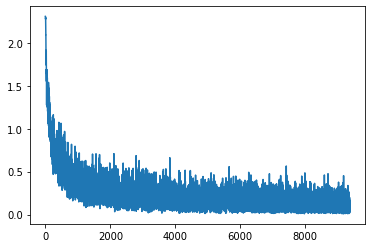

In [29]:
epochs = 10
batch_size = 64

rnn_model.train()

losses = []
for epoch in range(epochs):
  for batch_num, input_data in enumerate(train_dataloader):
    if batch_num == 0 or batch_num == round(len(training_data) / batch_size)-1:
      print(f"Batch num: {batch_num}")
      print(f"Input data shape: {input_data[0].shape}")
    else:
      pass
    
    optimizer.zero_grad()
    x, y = input_data
    x = x.to(device).float()
    y = y.to(device)

    output = rnn_model(x.reshape(-1, 28, 28))
    loss = criterion(output, y)
    loss.backward()
    losses.append(loss.item())

    optimizer.step()

    if batch_num % 100 == 0:
      print('\tEpoch %d | Batch %d | Loss %6.2f' % (epoch, batch_num, loss.item()))
  print('Epoch %d | Loss %6.2f' % (epoch, sum(losses)/len(losses)))
plt.plot(losses)


In [30]:
import csv
rnn_model.eval()

with open('cnn_submission.csv', 'w') as f:
    fieldnames = ['ImageId', 'Label']
    writer = csv.DictWriter(f, fieldnames=fieldnames, lineterminator = '\n')
    writer.writeheader()
    image_id = 1

    with torch.no_grad():
        predictions = []
        num = 1
        for x, y_targ in test_dataloader:
            x = x.to(device).float()

            output = rnn_model(x.reshape(-1, 28, 28)).argmax(dim=1)
            for y in output:
                writer.writerow({fieldnames[0]: image_id,fieldnames[1]: y.item()})
                image_id += 1
            
            if len(test_dataloader) % num == 5:
              print(output)
              print(y_targ)

            num += 1
            predictions.append(torch.eq(output, y_targ))
        
        print(predictions[0])
        print(predictions[0].shape)
        print(sum(predictions[:2]))
        print(len(predictions))
        tot_sum = 0
        tot_len = 0
        for tensor in predictions:
          tot_sum += sum(tensor)
          tot_len += len(tensor)
        accuracy = tot_sum / tot_len
        print(f"Length of predictions: {tot_len}")
        print(f"Accuracy : {accuracy}")
        

tensor([4, 5, 6, 3, 9, 8, 7, 2, 1, 0, 3, 2, 2, 2, 7, 8, 8, 5, 8, 6, 3, 8, 0, 9,
        5, 1, 0, 4, 7, 6, 1, 4, 1, 4, 0, 1, 2, 9, 4, 9, 3, 1, 8, 0, 2, 0, 8, 4,
        3, 2, 3, 3, 4, 1, 2, 9, 9, 1, 8, 2, 5, 8, 5, 9])
tensor([4, 5, 6, 3, 9, 8, 7, 2, 1, 0, 3, 2, 2, 2, 7, 8, 8, 5, 8, 6, 3, 8, 0, 9,
        8, 1, 0, 4, 7, 6, 1, 4, 1, 4, 0, 1, 2, 9, 4, 9, 3, 1, 8, 0, 2, 0, 8, 4,
        3, 2, 3, 3, 4, 1, 2, 4, 9, 1, 8, 2, 5, 8, 5, 1])
tensor([0, 2, 3, 3, 0, 2, 3, 1, 1, 0, 9, 4, 5, 8, 7, 0, 6, 3, 1, 8, 9, 3, 1, 6,
        9, 7, 3, 2, 7, 0, 5, 1, 0, 4, 1, 2, 9, 2, 3, 0, 1, 4, 0, 8, 2, 3, 1, 8,
        2, 3, 9, 5, 0, 3, 8, 2, 2, 0, 6, 6, 8, 4, 3, 1])
tensor([0, 2, 3, 3, 0, 2, 3, 1, 1, 0, 9, 4, 5, 8, 7, 0, 6, 3, 1, 8, 9, 3, 1, 6,
        9, 7, 3, 2, 7, 0, 5, 1, 0, 9, 1, 2, 9, 2, 3, 0, 1, 6, 0, 8, 2, 3, 1, 8,
        2, 3, 9, 5, 0, 3, 8, 2, 2, 0, 6, 6, 8, 4, 3, 1])
tensor([2, 4, 6, 5, 8, 5, 1, 6, 6, 7, 2, 4, 1, 3, 2, 7, 4, 6, 1, 6, 0, 9, 2, 1,
        5, 4, 4, 7, 1, 7, 4, 4, 5, 3, 6, 9, 7, 9, 2,